## Face Detection

Face detection is a technique that identifies or locates human faces in digital images.
OpenCV offers two pre-trained face detection classifiers, we will be using the Haar Cascade Classifier.

If you want to train your own classifier to detect other objects like poodles, chairs etc. you can use OpenCV to do so. More details here:
https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html

### Setup

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# for resizing our inline images
import pylab
pylab.rcParams['figure.figsize'] = (8, 7)

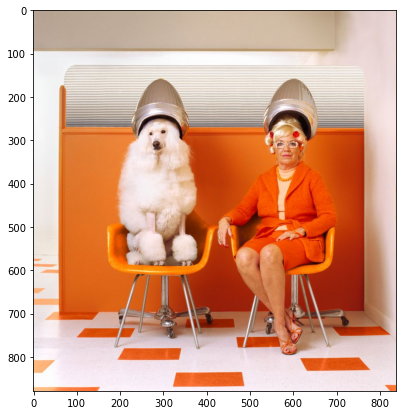

In [3]:
# load image
img = cv2.imread('./img/notebook/hair_salon.jpeg')
# change color space
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

### Loading the frontal face classifier

In [4]:
haar_cascade_face = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')

The __detectMultiscale()__ function will return the coordinates and dimensions of the detected faces as Rect (x, y, w, h)

In [5]:
# detect faces
faces_rects = haar_cascade_face.detectMultiScale(rgb_img, scaleFactor = 1.2, minNeighbors = 2);

# print the number of faces found
print('Faces found: ', len(faces_rects))

Faces found:  2


How come there are two faces? Is the algorithm picking up on the poodle?

Let's loop over the coordinates it returned and draw rectangles around them to find out.

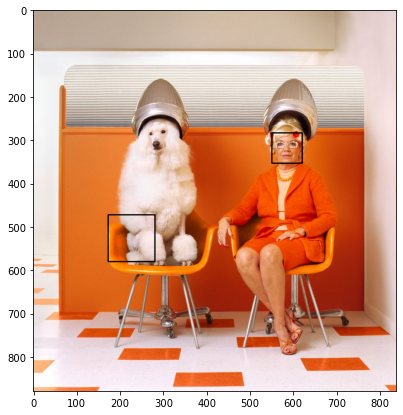

In [6]:
# create a copy of the image
image_copy = rgb_img.copy()

for (x,y,w,h) in faces_rects:
     cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 0, 0), 2)
        
plt.imshow(image_copy)

In [7]:
# remove the wrong face
clean_faces = np.delete(faces_rects, 1, 0)
clean_faces

array([[551, 283,  70,  70]], dtype=int32)

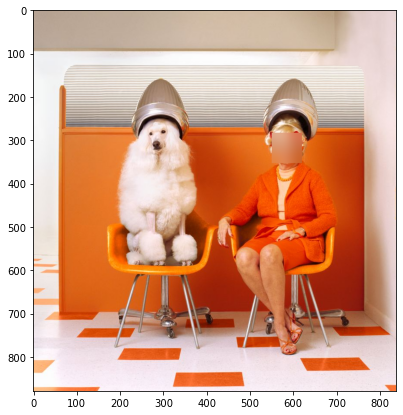

In [8]:
# apply blur
for (x, y, w, h) in clean_faces:
    # select the areas where the face was found
    roi = rgb_img[y:y+h, x:x+w]
    # blur the ROI
    blur = cv2.GaussianBlur(roi, (101,101), 0)        
    # Insert ROI back into image
    rgb_img[y:y+h, x:x+w] = blur
    
plt.imshow(rgb_img)